In [1]:
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from moses_cross_val.main import moses_runner, model_evaluator, cross_val
from moses_cross_val.filters import loader
from utils import *
from dataset_utils import *
import matplotlib.pyplot as plt

In [3]:
# train_file, test_file = train_test_df_split("data/tamoxBinary_top100_genes.csv", "posOutcome")
train_file, test_file = "data/tamoxBinary_top100_genes_train.csv", "data/tamoxBinary_top100_genes_test.csv"

In [ ]:
cv_w_pen = cross_val.CrossValidation("tamoxBinary_top100_genes_train.csv", "data/cv_pen_div/",
                               "posOutcome", moses_options_w_pen_div, cross_val_opts, "precision", 0.75)

cv_w_pen.run_folds()

In [28]:
cv_w_pen.dataset = "/home/xabush/moses-incons-pen-xp/data/tamoxBinary_top100_genes.csv"
cv_w_pen.filter_value = 0.80
ensemble_df = cv_w_pen.majority_vote()

,model,recall,precision,accuracy,f1_score,p_value
0,or(and(or(and(or($DERL1 $CDKN1C) $NTRK2) and($...,0.873239,0.821192,0.766839,0.846416,5.612287e-15
1,ensemble,0.946921,0.835206,0.823988,0.887562,7.674086e-54


In [9]:
df_w_pen_div = parse_combo_dir("data/cv_pen_div/", train_file, test_file)
df_w_pen_div.head()

,model,complexity,fold,recall_train,precision_train,balanced_acc_train,f1_train,spec_train,recall_test,precision_test,balanced_acc_test,f1_test,spec_test
0,or(and(or(and(!$ABAT $ENPP2) and(!$RBX1 $VPS39...,22,0,0.965426,0.804878,0.661545,0.877872,0.357664,0.915789,0.790909,0.619659,0.848780,0.323529
1,or(and(or(and(!$ABAT $ENPP2) and(!$RBX1 $VPS39...,16,0,0.962766,0.792123,0.634668,0.869148,0.306569,0.905263,0.788991,0.614396,0.843137,0.323529
2,or(and(or(and(!$ABAT $ENPP2) and(!$RBX1 $VPS39...,22,0,0.954787,0.803132,0.656226,0.872418,0.357664,0.905263,0.781818,0.599690,0.839024,0.294118
3,or(and(or(and(!$ABAT $ENPP2) and(!$RBX1 $VPS39...,22,0,0.954787,0.801339,0.652576,0.871359,0.350365,0.894737,0.779817,0.594427,0.833333,0.294118
4,or(and(or(and(!$ABAT $ENPP2) and(!$RBX1 $VPS39...,22,0,0.949468,0.804054,0.657216,0.870732,0.364964,0.915789,0.790909,0.619659,0.848780,0.323529


<AxesSubplot:ylabel='balanced_acc_test'>

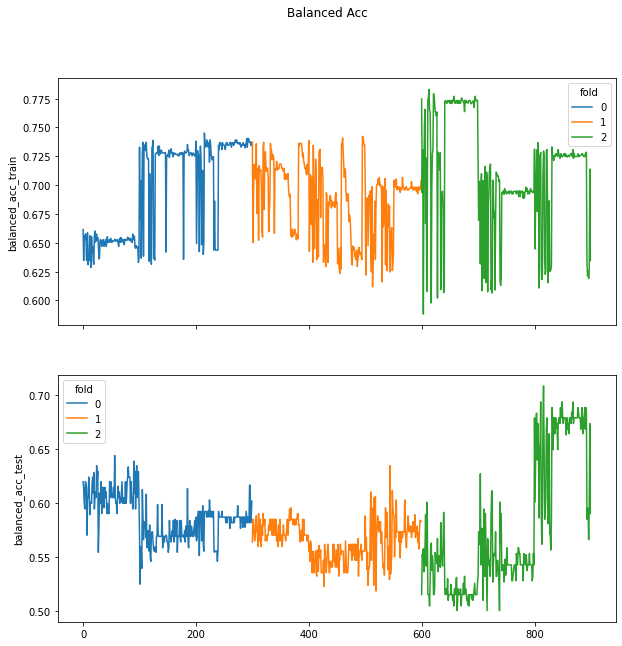

In [10]:

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 10))

fig.suptitle("Balanced Acc")

sns.lineplot(x=df_w_pen_div.index, y="balanced_acc_train", data=df_w_pen_div, hue="fold", ax=ax1)

sns.lineplot(x=df_w_pen_div.index, y="balanced_acc_test", data=df_w_pen_div, hue="fold", ax=ax2)

<AxesSubplot:ylabel='precision_test'>

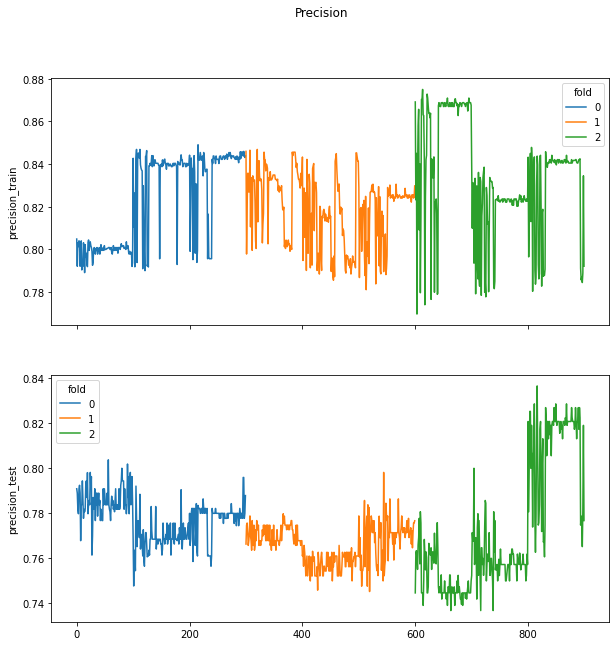

In [11]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 10))

fig.suptitle("Precision")

sns.lineplot(x=df_w_pen_div.index, y="precision_train", data=df_w_pen_div, hue="fold", ax=ax1)

sns.lineplot(x=df_w_pen_div.index, y="precision_test", data=df_w_pen_div, hue="fold", ax=ax2)

<AxesSubplot:ylabel='complexity'>

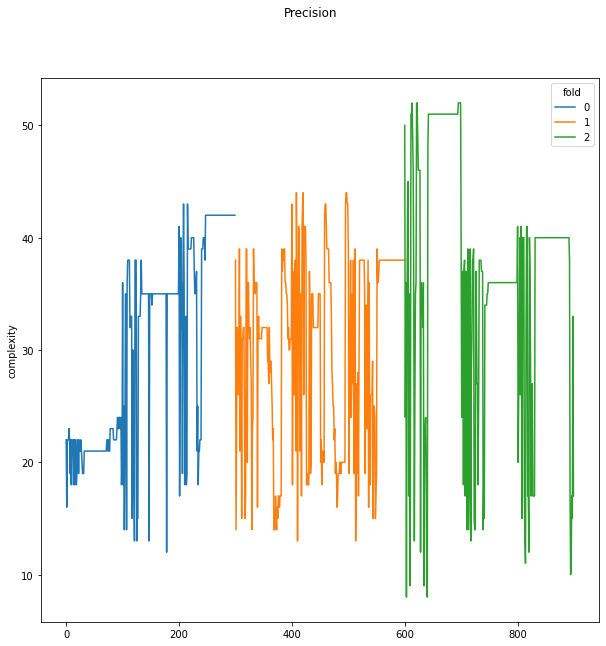

In [12]:

fig, ax1 = plt.subplots(1, sharex=True, figsize=(10, 10))

fig.suptitle("Precision")

sns.lineplot(x=df_w_pen_div.index, y="complexity", data=df_w_pen_div, hue="fold", ax=ax1)